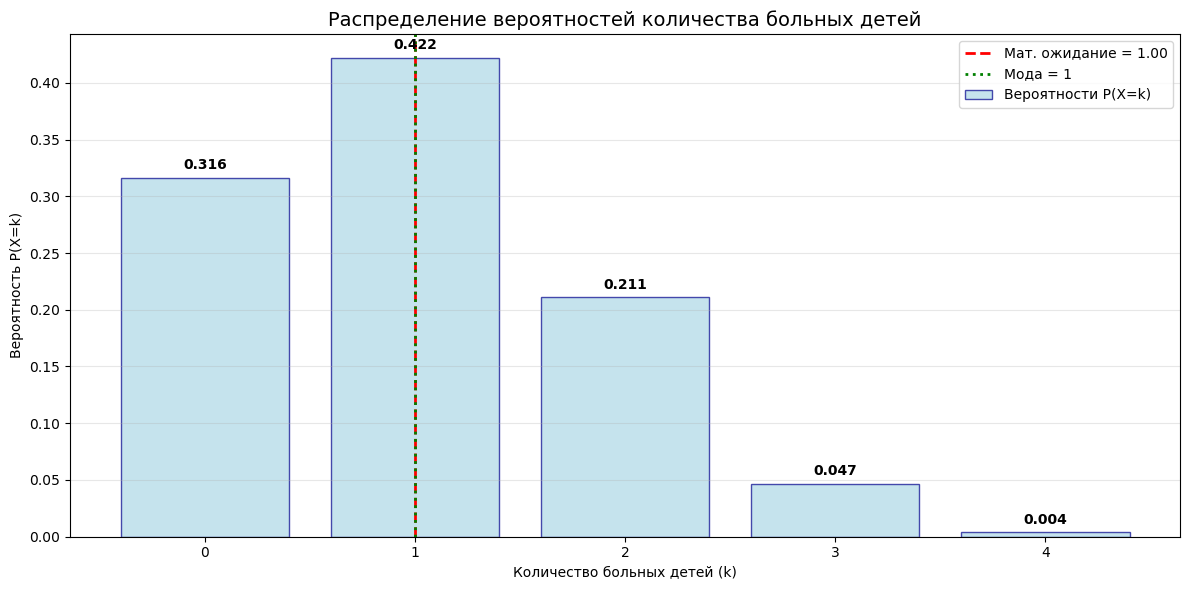

In [14]:
# Законы распределения дискретных случайных величин
# Биномиальный закон распределения
# Сценарий: У двух здоровых родителей, являющихся носителями рецессивного гена некоторого заболевания, рождается 4 ребёнка.
# Вероятность рождения больного ребёнка у таких родителей составляет 25%.
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def bin(n, i, p, q):
    return math.comb(n, i) * (p ** i) * (q ** (n - i))

p = 0.25
n = 4
q = 1 - p

# Заполнение X
X = dict()
for i in range(n+1):
    X[i] = bin(n, i, p, q)

df = pd.DataFrame(data = X.values(), index = X.keys())

# Мат ожидание
m = n * p

# Дисперсия
d = n * p * q

# Среднее квадратичное отклонение
w = math.sqrt(d)

# Мода
if (n + 1) * p == int((n + 1) * p):
    mod = [int((n + 1) * p) - 1, int((n + 1) * p)]
else:
    mod = int((n + 1) * p)

# Отображение многоугольника распределения
plt.figure(figsize=(12, 6))

k_values = list(X.keys())
probabilities = list(X.values())
bars = plt.bar(k_values, probabilities, color='lightblue', 
               edgecolor='darkblue', alpha=0.7, 
               label='Вероятности P(X=k)')

for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

plt.title('Распределение вероятностей количества больных детей', fontsize=14)
plt.xlabel('Количество больных детей (k)')
plt.ylabel('Вероятность P(X=k)')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(k_values)

plt.axvline(x=m, color='red', linestyle='--', linewidth=2, 
            label=f'Мат. ожидание = {m:.2f}')
plt.axvline(x=mod, color='green', linestyle=':', linewidth=2, 
            label=f'Мода = {mod}')

plt.legend()
plt.tight_layout()
plt.show()

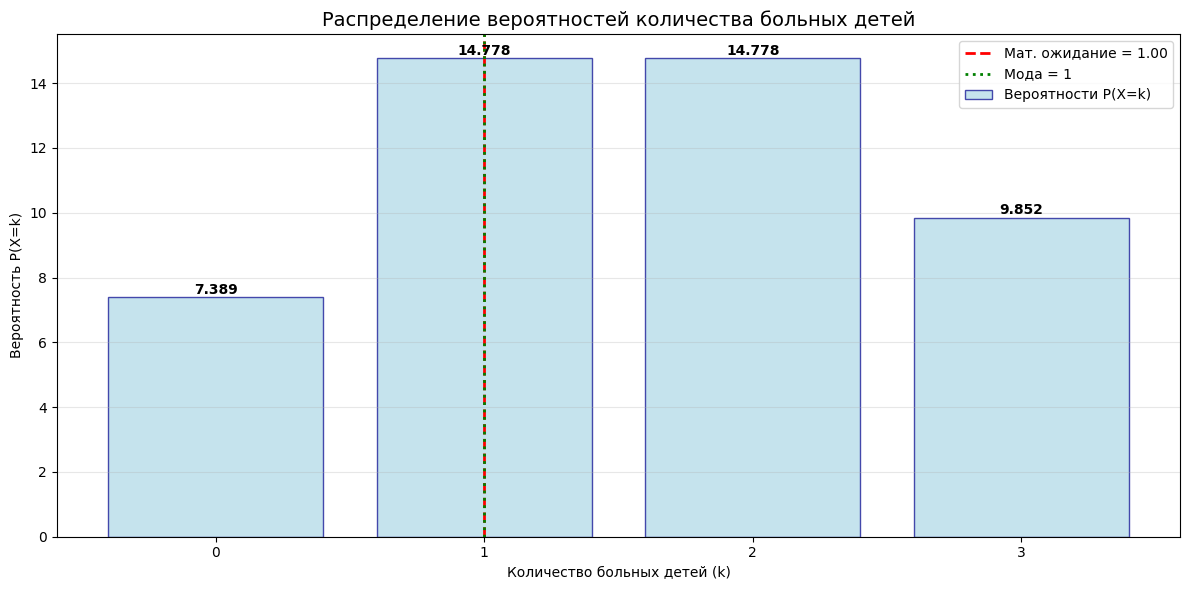

Вероятность такого события:  46.79735529322745 %


In [20]:
# Закон распределения Пуассона
# Сценарий: на заводе производится партия из 1000 микросхем. Вероятность брака для каждой микросхемы составляет 0.002. Найти вероятность, 
# что бракованных микросхем будет не более 4

def distribution(lambda_val, i):
    return (lambda_val) ** i/(math.factorial(i) * (math.e ** (-1 * lambda_val)))

n_p = 1000
k_p = 4
p_p = 0.002
q_p = 1 - p_p

if n_p * p_p < 10:
    X_p = dict()
    for i in range(k_p):
        X_p[i] = distribution(n_p*p_p, i)
        
    df = pd.DataFrame(data = X.values(), index = X.keys())

    # Мат ожидание
    m_p = n_p * n_p
    
    # Дисперсия
    d_p = m_p * q_p
    
    # Среднее квадратичное отклонение
    w_p = math.sqrt(d_p)
    
    # Мода
    if (n_p + 1) * p_p == int((n_p + 1) * p_p):
        mod_p = [int((n_p + 1) * p_p) - 1, int((n_p + 1) * p_p)]
    else:
        mod_p = int((n_p + 1) * p_p)

# Отображение многоугольника распределения
plt.figure(figsize=(12, 6))

k_values = list(X_p.keys())
probabilities = list(X_p.values())
bars = plt.bar(k_values, probabilities, color='lightblue', 
               edgecolor='darkblue', alpha=0.7, 
               label='Вероятности P(X=k)')

for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

plt.title('Распределение вероятностей количества больных детей', fontsize=14)
plt.xlabel('Количество больных детей (k)')
plt.ylabel('Вероятность P(X=k)')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(k_values)

plt.axvline(x=m, color='red', linestyle='--', linewidth=2, 
            label=f'Мат. ожидание = {m:.2f}')
plt.axvline(x=mod, color='green', linestyle=':', linewidth=2, 
            label=f'Мода = {mod}')

plt.legend()
plt.tight_layout()
plt.show()

s = 0
for i in range(k_p):
    s = s + X_p[i]

print("Вероятность такого события: ", s, "%")

In [ ]:
# Геометрический закон распределения
# Сценарий: вероятность того, что случайно выбранный кандидат подходит на вакансию, равна 0.2. HR проводит собеседования до первого подходящего 
# кандидата. Найти вероятность, что потребуется провести более 5 собеседований

from scipy.stats import geom

p_g = 0.2
q_g = 1 - p_g
n_g = 5

geom_dist = geom(p)
prob_more_than_5 = 1 - geom_dist.cdf(5)

In [ ]:
# Гипергеометрический закон распределения
# Сценарий: в лотерее 100 билетов, из которых 10 выигрышных. Человек покупает 5 билетов. Найти вероятность, что все билеты будут проигрышными.

